In [30]:
import pandas_datareader as pdr

In [31]:
key='42c4b1a6de90d0dafdf6444ef77250b40080bc54'

In [32]:
df= pdr.get_data_tiingo('AAPL',api_key=key)

/Users/mathew/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [33]:
df.to_csv('AAPL.csv')

In [34]:
import pandas as pd

In [35]:
df=pd.read_csv('AAPL.csv')

In [36]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-24 00:00:00+00:00,193.00,193.66,192.050,192.45,18697898,46.107448,46.265121,45.880494,45.976053,74791592,0.0,1.0
1,AAPL,2018-07-25 00:00:00+00:00,194.82,194.85,192.430,193.06,16826483,46.542243,46.549410,45.971275,46.121782,67305932,0.0,1.0
2,AAPL,2018-07-26 00:00:00+00:00,194.21,195.96,193.610,194.61,19075964,46.396515,46.814588,46.253176,46.492075,76303856,0.0,1.0
3,AAPL,2018-07-27 00:00:00+00:00,190.98,195.19,190.100,194.99,24023972,45.624872,46.630636,45.414641,46.582856,96095888,0.0,1.0
4,AAPL,2018-07-30 00:00:00+00:00,189.91,192.20,189.070,191.90,21029535,45.369251,45.916329,45.168576,45.844659,84118140,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2023-07-17 00:00:00+00:00,193.99,194.32,191.810,191.90,50520159,193.990000,194.320000,191.810000,191.900000,50520159,0.0,1.0
1253,AAPL,2023-07-18 00:00:00+00:00,193.73,194.33,192.415,193.35,48353774,193.730000,194.330000,192.415000,193.350000,48353774,0.0,1.0
1254,AAPL,2023-07-19 00:00:00+00:00,195.10,198.23,192.650,193.10,80507323,195.100000,198.230000,192.650000,193.100000,80507323,0.0,1.0
1255,AAPL,2023-07-20 00:00:00+00:00,193.13,196.47,192.495,195.09,59581196,193.130000,196.470000,192.495000,195.090000,59581196,0.0,1.0


In [37]:
df2=df.reset_index()['close']

In [38]:
df2

0       193.00
1       194.82
2       194.21
3       190.98
4       189.91
         ...  
1252    193.99
1253    193.73
1254    195.10
1255    193.13
1256    191.94
Name: close, Length: 1257, dtype: float64

In [39]:
import matplotlib.pyplot as plt

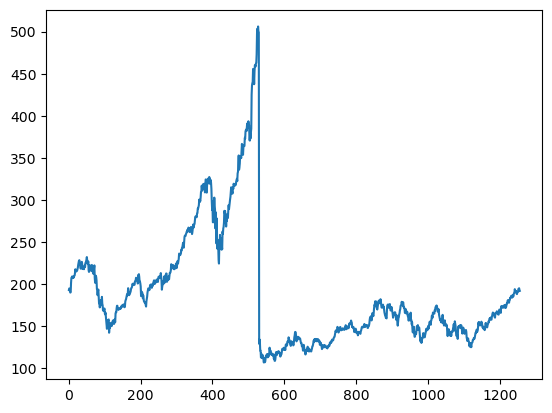

In [40]:
plt.plot(df2)

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [43]:
df1.shape

(1257, 1)

In [44]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size

In [45]:
train_size,test_size

(817, 440)

In [46]:
train_data=df1[:train_size,:1]
test_data=df1[train_size:train_size+test_size,:1]

In [47]:
train_data.shape,test_data.shape

((817, 1), (440, 1))

In [48]:
test_data

array([[0.10624922],
       [0.10680025],
       [0.10482154],
       [0.10469631],
       [0.1063995 ],
       [0.10522229],
       [0.11453976],
       [0.10760175],
       [0.10549781],
       [0.10815279],
       [0.11183469],
       [0.1105072 ],
       [0.1113087 ],
       [0.10920476],
       [0.1101315 ],
       [0.10289292],
       [0.10276769],
       [0.10807765],
       [0.10810269],
       [0.11060739],
       [0.11684408],
       [0.12781465],
       [0.13452724],
       [0.13570445],
       [0.13668128],
       [0.13800877],
       [0.12515967],
       [0.13375078],
       [0.14642455],
       [0.14509706],
       [0.14256731],
       [0.1377583 ],
       [0.14647464],
       [0.16115216],
       [0.17092048],
       [0.16961803],
       [0.181866  ],
       [0.17257358],
       [0.16904195],
       [0.18149029],
       [0.16385723],
       [0.16105197],
       [0.15757044],
       [0.16568566],
       [0.17232311],
       [0.17392611],
       [0.18407013],
       [0.181

In [49]:
def create_dataset(df,timestep):
    Data_x=[]
    Data_y=[]
    for i in range(len(df)-timestep):
        row=df[i:i+timestep,0]
        Data_x.append(row)
        target=df[i+timestep,0]
        Data_y.append(target)
    return np.array(Data_x),np.array(Data_y)


In [50]:
Xtrain,Ytrain=create_dataset(train_data,100)
Xtest,Ytest=create_dataset(test_data,100)

In [51]:
Xtrain.shape,Ytrain.shape

((717, 100), (717,))

In [52]:
Xtest.shape,Ytest.shape

((340, 100), (340,))

In [53]:
Xtrain

array([[0.21580463, 0.22036318, 0.21883532, ..., 0.15476518, 0.15594239,
        0.16057608],
       [0.22036318, 0.21883532, 0.21074515, ..., 0.15594239, 0.16057608,
        0.14687539],
       [0.21883532, 0.21074515, 0.20806512, ..., 0.16057608, 0.14687539,
        0.14301816],
       ...,
       [0.05024421, 0.05011897, 0.0461866 , ..., 0.08683782, 0.085335  ,
        0.09247339],
       [0.05011897, 0.0461866 , 0.04450845, ..., 0.085335  , 0.09247339,
        0.09517846],
       [0.0461866 , 0.04450845, 0.0436819 , ..., 0.09247339, 0.09517846,
        0.09946149]])

In [54]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1)
Xtest=Xtest.reshape(Xtest.shape[0],Xtest.shape[1],1)

In [55]:
Xtrain.shape,Xtest.shape

((717, 100, 1), (340, 100, 1))

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 116ms/step - loss: 0.0356 - val_loss: 8.3835e-04
Epoch 2/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0160 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0112 - val_loss: 4.5104e-04
Epoch 4/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0091 - val_loss: 4.7393e-04
Epoch 5/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0082 - val_loss: 4.6429e-04
Epoch 6/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0072 - val_loss: 5.8722e-04
Epoch 7/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0067 - val_loss: 2.8261e-04
Epoch 8/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0060 - val_loss: 8.3337e-04
Epoch 9/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0053 - val_loss: 4.1293e-04
Epoch 10/100
12/12 [==============================] - 1s 92ms/step 

12/12 [==============================] - 1s 79ms/step - loss: 0.0014 - val_loss: 2.0471e-04
Epoch 80/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0016 - val_loss: 2.5410e-04
Epoch 81/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0011 - val_loss: 1.9907e-04
Epoch 82/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0012 - val_loss: 2.1902e-04
Epoch 83/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0017 - val_loss: 3.3887e-04
Epoch 84/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0019 - val_loss: 4.0583e-04
Epoch 85/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0018 - val_loss: 2.1432e-04
Epoch 86/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0013 - val_loss: 2.0058e-04
Epoch 87/100
12/12 [==============================] - 1s 78ms/step - loss: 0.0012 - val_loss: 2.0353e-04
Epoch 88/100
12/12 [==============================] - 1s 80ms/step -

model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=100,batch_size=64,verbose=1)

In [60]:
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

11/11 [==============================] - 0s 11ms/step


In [61]:
train_predict.shape,test_predict.shape

((717, 1), (340, 1))

In [62]:
test_predict

array([[0.12734528],
       [0.12460493],
       [0.12274238],
       [0.12196197],
       [0.12247121],
       [0.12411639],
       [0.12689818],
       [0.13054667],
       [0.13507102],
       [0.14009564],
       [0.14525406],
       [0.1505956 ],
       [0.15564415],
       [0.15967035],
       [0.1625127 ],
       [0.16484432],
       [0.16635045],
       [0.16664098],
       [0.16595978],
       [0.1643588 ],
       [0.16158383],
       [0.15830304],
       [0.15534008],
       [0.15226518],
       [0.14916444],
       [0.1465509 ],
       [0.14454147],
       [0.14302228],
       [0.14133596],
       [0.13964221],
       [0.13731414],
       [0.13451375],
       [0.13247223],
       [0.13063169],
       [0.1289582 ],
       [0.12767865],
       [0.1276247 ],
       [0.12751411],
       [0.12712996],
       [0.12586954],
       [0.12420179],
       [0.12146159],
       [0.11745635],
       [0.11324278],
       [0.10916659],
       [0.10591906],
       [0.10262045],
       [0.098

In [63]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [64]:
import math
from sklearn.metrics import mean_squared_error

In [65]:
math.sqrt(mean_squared_error(Ytrain,train_predict))

213.73022984521938

In [66]:
math.sqrt(mean_squared_error(Ytest,test_predict))

155.01362764774305

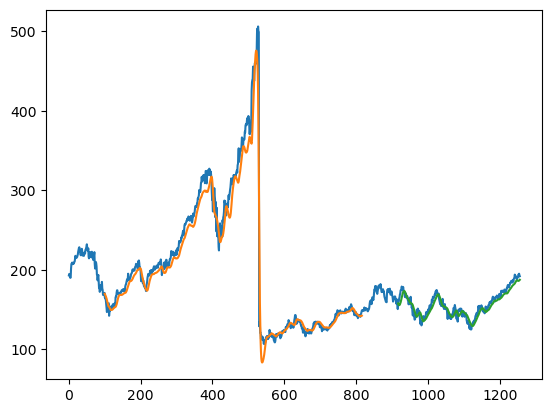

In [67]:
lookback=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lookback:lookback+len(train_predict),:]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(2*lookback):len(df1),:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
len(test_data)

440

In [80]:
x_input=test_data[340:].reshape(1,-1)

In [81]:
x_input

array([[0.10161553, 0.09635567, 0.09785848, 0.11068253, 0.11769568,
        0.11211021, 0.11529117, 0.10958046, 0.10434565, 0.1092799 ,
        0.11458986, 0.11559173, 0.12275517, 0.12062617, 0.12663745,
        0.13134627, 0.12771446, 0.13046963, 0.13377583, 0.12884158,
        0.12726362, 0.13507827, 0.13906074, 0.14542267, 0.14860363,
        0.1472511 , 0.14256731, 0.14482154, 0.13823419, 0.13515341,
        0.13340013, 0.14707577, 0.14619912, 0.14624922, 0.14935504,
        0.15226049, 0.14980589, 0.14572323, 0.14649969, 0.14259236,
        0.14256731, 0.15421415, 0.15739512, 0.15716969, 0.15453976,
        0.15180964, 0.14765185, 0.16713838, 0.16696306, 0.16262993,
        0.16710081, 0.16758923, 0.16463369, 0.16338134, 0.16338134,
        0.16493425, 0.17084534, 0.17112085, 0.16871634, 0.16210394,
        0.16280526, 0.16568566, 0.17179712, 0.1764809 , 0.17635567,
        0.183469  , 0.18562304, 0.18219161, 0.18126487, 0.17778334,
        0.18467126, 0.18564809, 0.19273638, 0.19

In [82]:
print(x_input.shape)

(1, 100)


In [83]:
temp_input=list(x_input)

In [84]:
temp_input

[array([0.10161553, 0.09635567, 0.09785848, 0.11068253, 0.11769568,
        0.11211021, 0.11529117, 0.10958046, 0.10434565, 0.1092799 ,
        0.11458986, 0.11559173, 0.12275517, 0.12062617, 0.12663745,
        0.13134627, 0.12771446, 0.13046963, 0.13377583, 0.12884158,
        0.12726362, 0.13507827, 0.13906074, 0.14542267, 0.14860363,
        0.1472511 , 0.14256731, 0.14482154, 0.13823419, 0.13515341,
        0.13340013, 0.14707577, 0.14619912, 0.14624922, 0.14935504,
        0.15226049, 0.14980589, 0.14572323, 0.14649969, 0.14259236,
        0.14256731, 0.15421415, 0.15739512, 0.15716969, 0.15453976,
        0.15180964, 0.14765185, 0.16713838, 0.16696306, 0.16262993,
        0.16710081, 0.16758923, 0.16463369, 0.16338134, 0.16338134,
        0.16493425, 0.17084534, 0.17112085, 0.16871634, 0.16210394,
        0.16280526, 0.16568566, 0.17179712, 0.1764809 , 0.17635567,
        0.183469  , 0.18562304, 0.18219161, 0.18126487, 0.17778334,
        0.18467126, 0.18564809, 0.19273638, 0.19

In [85]:
temp_input=temp_input[0].tolist()

In [86]:
len(temp_input)

100

In [87]:
temp_input

[0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.151809643080

In [88]:
from numpy import array

In [89]:
lst_output=[]
timesteps=100
i=0

while(i<30):
    if (len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print(x_input.shape)
        x_input=x_input.reshape((-1,1))
        print(x_input.shape)
        x_input=x_input.reshape((1,timesteps,1))
        print(x_input.shape)
        print("temp_input is this long",len(temp_input))
        print('{} input is {}'.format(i,x_input))
        yhat=model.predict(x_input,verbose=0)
        print(yhat.shape)
        print('{} output is yhat is{},yhat[0] is{}'.format(i,yhat,yhat[0]))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        
        i = i+1
    else:
        x_input=x_input.reshape((1,timesteps,1))
        print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0],"bruh")
        print(yhat)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

[[[0.10161553]
  [0.09635567]
  [0.09785848]
  [0.11068253]
  [0.11769568]
  [0.11211021]
  [0.11529117]
  [0.10958046]
  [0.10434565]
  [0.1092799 ]
  [0.11458986]
  [0.11559173]
  [0.12275517]
  [0.12062617]
  [0.12663745]
  [0.13134627]
  [0.12771446]
  [0.13046963]
  [0.13377583]
  [0.12884158]
  [0.12726362]
  [0.13507827]
  [0.13906074]
  [0.14542267]
  [0.14860363]
  [0.1472511 ]
  [0.14256731]
  [0.14482154]
  [0.13823419]
  [0.13515341]
  [0.13340013]
  [0.14707577]
  [0.14619912]
  [0.14624922]
  [0.14935504]
  [0.15226049]
  [0.14980589]
  [0.14572323]
  [0.14649969]
  [0.14259236]
  [0.14256731]
  [0.15421415]
  [0.15739512]
  [0.15716969]
  [0.15453976]
  [0.15180964]
  [0.14765185]
  [0.16713838]
  [0.16696306]
  [0.16262993]
  [0.16710081]
  [0.16758923]
  [0.16463369]
  [0.16338134]
  [0.16338134]
  [0.16493425]
  [0.17084534]
  [0.17112085]
  [0.16871634]
  [0.16210394]
  [0.16280526]
  [0.16568566]
  [0.17179712]
  [0.1764809 ]
  [0.17635567]
  [0.183469  ]
  [0.18562

(1, 1)
6 output is yhat is[[0.19405487]],yhat[0] is[0.19405487]
(100,)
(100, 1)
(1, 100, 1)
temp_input is this long 101
7 input is [[[0.10958046]
  [0.10434565]
  [0.1092799 ]
  [0.11458986]
  [0.11559173]
  [0.12275517]
  [0.12062617]
  [0.12663745]
  [0.13134627]
  [0.12771446]
  [0.13046963]
  [0.13377583]
  [0.12884158]
  [0.12726362]
  [0.13507827]
  [0.13906074]
  [0.14542267]
  [0.14860363]
  [0.1472511 ]
  [0.14256731]
  [0.14482154]
  [0.13823419]
  [0.13515341]
  [0.13340013]
  [0.14707577]
  [0.14619912]
  [0.14624922]
  [0.14935504]
  [0.15226049]
  [0.14980589]
  [0.14572323]
  [0.14649969]
  [0.14259236]
  [0.14256731]
  [0.15421415]
  [0.15739512]
  [0.15716969]
  [0.15453976]
  [0.15180964]
  [0.14765185]
  [0.16713838]
  [0.16696306]
  [0.16262993]
  [0.16710081]
  [0.16758923]
  [0.16463369]
  [0.16338134]
  [0.16338134]
  [0.16493425]
  [0.17084534]
  [0.17112085]
  [0.16871634]
  [0.16210394]
  [0.16280526]
  [0.16568566]
  [0.17179712]
  [0.1764809 ]
  [0.17635567]

(1, 1)
14 output is yhat is[[0.17641658]],yhat[0] is[0.17641658]
(100,)
(100, 1)
(1, 100, 1)
temp_input is this long 101
15 input is [[[0.13134627]
  [0.12771446]
  [0.13046963]
  [0.13377583]
  [0.12884158]
  [0.12726362]
  [0.13507827]
  [0.13906074]
  [0.14542267]
  [0.14860363]
  [0.1472511 ]
  [0.14256731]
  [0.14482154]
  [0.13823419]
  [0.13515341]
  [0.13340013]
  [0.14707577]
  [0.14619912]
  [0.14624922]
  [0.14935504]
  [0.15226049]
  [0.14980589]
  [0.14572323]
  [0.14649969]
  [0.14259236]
  [0.14256731]
  [0.15421415]
  [0.15739512]
  [0.15716969]
  [0.15453976]
  [0.15180964]
  [0.14765185]
  [0.16713838]
  [0.16696306]
  [0.16262993]
  [0.16710081]
  [0.16758923]
  [0.16463369]
  [0.16338134]
  [0.16338134]
  [0.16493425]
  [0.17084534]
  [0.17112085]
  [0.16871634]
  [0.16210394]
  [0.16280526]
  [0.16568566]
  [0.17179712]
  [0.1764809 ]
  [0.17635567]
  [0.183469  ]
  [0.18562304]
  [0.18219161]
  [0.18126487]
  [0.17778334]
  [0.18467126]
  [0.18564809]
  [0.1927363

(1, 1)
22 output is yhat is[[0.16166633]],yhat[0] is[0.16166633]
(100,)
(100, 1)
(1, 100, 1)
temp_input is this long 101
23 input is [[[0.14542267]
  [0.14860363]
  [0.1472511 ]
  [0.14256731]
  [0.14482154]
  [0.13823419]
  [0.13515341]
  [0.13340013]
  [0.14707577]
  [0.14619912]
  [0.14624922]
  [0.14935504]
  [0.15226049]
  [0.14980589]
  [0.14572323]
  [0.14649969]
  [0.14259236]
  [0.14256731]
  [0.15421415]
  [0.15739512]
  [0.15716969]
  [0.15453976]
  [0.15180964]
  [0.14765185]
  [0.16713838]
  [0.16696306]
  [0.16262993]
  [0.16710081]
  [0.16758923]
  [0.16463369]
  [0.16338134]
  [0.16338134]
  [0.16493425]
  [0.17084534]
  [0.17112085]
  [0.16871634]
  [0.16210394]
  [0.16280526]
  [0.16568566]
  [0.17179712]
  [0.1764809 ]
  [0.17635567]
  [0.183469  ]
  [0.18562304]
  [0.18219161]
  [0.18126487]
  [0.17778334]
  [0.18467126]
  [0.18564809]
  [0.19273638]
  [0.19153413]
  [0.19313713]
  [0.19829681]
  [0.19556669]
  [0.19579211]
  [0.19316218]
  [0.20077646]
  [0.1999749

In [ ]:
## len(df1)

In [176]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

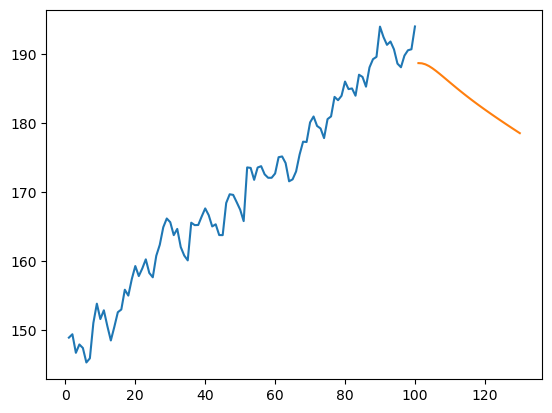

In [179]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [180]:
df3=df1.tolist()
df3.extend(lst_output)

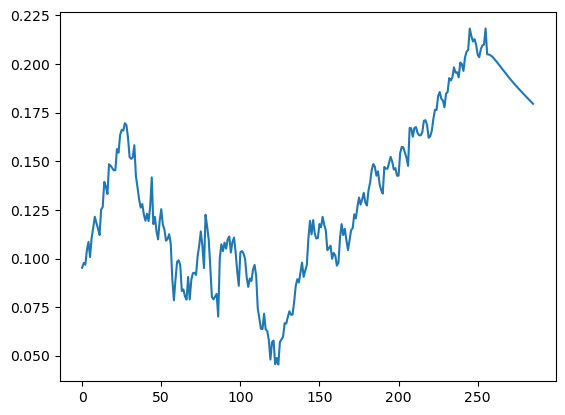

In [181]:
plt.plot(df3[1000:])